In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tct

In [24]:
metadata, data = tct.read("data/hvsccan20190628_2")

In [25]:
metadata

{'filetype': 82,
 'day': 28,
 'month': 6,
 'year': 2019,
 'hour': 16,
 'minutes': 51,
 'seconds': 9,
 'abstime': 3644578304.0,
 'x0': -17795.001953125,
 'dx': 4.699999809265137,
 'nx': 1,
 'y0': 8399.990234375,
 'dy': 2.0,
 'ny': 1,
 'z0': 31200.501953125,
 'dz': 1.0,
 'nz': 1,
 'time': datetime.datetime(2019, 6, 28, 16, 51, 9),
 'wfonoff': [1, 0, 0, 0],
 'nu1': 21,
 'u1': array([-20. , -21.5, -23. , -24.5, -26. , -27.5, -29. , -30.5, -32. ,
        -33.5, -35. , -36.5, -38. , -39.5, -41. , -42.5, -44. , -45.5,
        -47. , -48.5, -50. ], dtype=float32),
 'nu2': 1,
 'u2': array([0.], dtype=float32),
 't0': 0.0,
 'dt': 4.000000059604645e-10,
 'NP': 1252,
 'T': 0.0,
 'source': 0,
 'user': '',
 'sample': '',
 'comment': ''}

Only first channel is on

In [26]:
metadata['wfonoff']

[1, 0, 0, 0]

In [34]:
import xarray
ds = xarray.DataArray(data['ch1'],
                      coords=[data['u1'], np.arange(0, metadata['NP'] * metadata['dt'], metadata['dt']) / 1E-9],
                      dims=['V', 'NP'])
ds.coords['NP'].attrs['unit'] = 'ns'
ds.coords['V'].attrs['units'] = 'V'

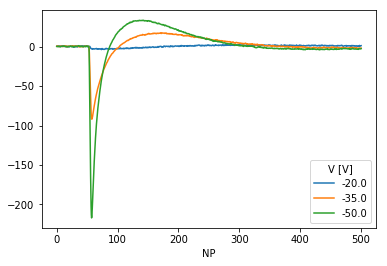

In [89]:
ds.isel(V=[0, len(ds.coords['V']) // 2, -1]).plot.line(x='NP')
plt.show()

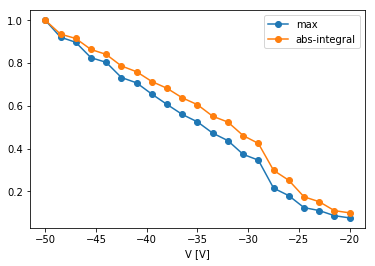

In [86]:
values_max = ds.max('NP')
values_abs_integral = np.abs(ds).sum('NP')

values_max /= values_max.isel(V=-1)
values_abs_integral /= values_abs_integral.isel(V=-1)

values_max.plot.line('-o', label='max')
values_abs_integral.plot.line('-o', label='abs-integral')

plt.legend()